## Load packages

In [77]:
import spacy
nlp = spacy.load('C:/Users/clu/Anaconda3/envs/firstprogram/lib/site-packages/en_core_web_sm/en_core_web_sm-2.0.0')
from spacy import displacy
import sqlite3
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import numpy as np
from operator import itemgetter
import datetime as dt
import matplotlib.dates as mdates
import json

## Conncet to database

In [78]:
conn = sqlite3.connect('reutersdata_clean.db')
cur = conn.cursor()

df = pd.read_sql("SELECT id,Titel,Body,Kategorie,Datum,Quelle FROM Artikel WHERE Quelle ='Reuters'", conn, index_col="id", parse_dates=True)
df.shape
df.head()

,Titel,Body,Kategorie,Datum,Quelle
id,,,,,
1,Italy budget concession hopes switch risk sent...,The euro bounced off six-week lows on Wednesda...,Top-Nachrichten,2018-10-03 00:00:00,Reuters
2,"Indonesia's Widodo says aid gearing up, worry ...",Indonesia’s President Joko Widodo made a secon...,Weltnachrichten,2018-10-02 00:00:00,Reuters
3,World Court orders U.S. to ensure Iran sanctio...,"The World Court, the highest United Nations tr...",Weltnachrichten,2018-10-03 00:00:00,Reuters
4,Instagram back up after worldwide outage,Facebook Inc’s (FB.O) photo-sharing social net...,Top-Nachrichten,2018-10-03 00:00:00,Reuters
5,Aston Martin skids on market debut,Shares in luxury automaker Aston Martin (AML.L...,Top-Nachrichten,2018-10-03 00:00:00,Reuters


In [79]:
df.shape

(222, 5)

## Save as csv

In [80]:
df.to_csv(path_or_buf="./datasets/news_en.csv", sep=',',encoding='utf-8')

## Count articles per day

In [81]:
artikelliste={}

for i in range(0, len(df)):
    datum = df.iloc[i]['Datum']
    datum = datum.split(" ")[0]
    
    if datum in artikelliste:
        artikelliste[datum] += 1
    else:
        artikelliste[datum] = 1
            

AttributeError: 'numpy.str_' object has no attribute 'toordinal'

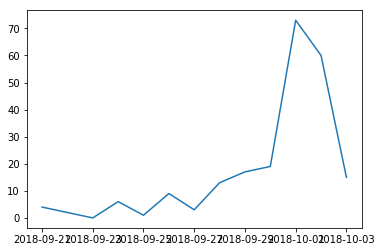

In [82]:
startdatum = "2018-09-21"
enddatum = "2018-10-03"

datelist = pd.date_range(start=startdatum, end=enddatum).tolist()
datelist = pd.to_datetime((datelist))

artikelliste0 =[]
for date in datelist:
    if str(date).split()[0] in artikelliste:
        artikelliste0.append(artikelliste[str(date).split()[0]])
    else:
        artikelliste0.append(0)
        
tickslist = pd.date_range(start=startdatum, end=enddatum, freq='1D').tolist()

plt.plot(datelist, artikelliste0, label="Article count")
plt.axis([startdatum, enddatum, 0, max(artikelliste0)])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.xlabel('Date')
plt.xticks(tickslist)
plt.ylabel('Count')
plt.suptitle('Articles per day')
plt.gcf().autofmt_xdate()
plt.legend()
plt.savefig('./images/anzahl_en.png', dpi=300)
plt.show()

## Mark persons and organizations

In [83]:
colors = {'ORG': 'red', 'PERSON':'yellow'}
options = {'ents': ['ORG', 'PERSON'], 'colors': colors}
for i in range(0, 10):
    titel = df.iloc[i]['Titel']
    body = df.iloc[i]['Body']
    doc = nlp(titel)
    doc.user_data['title'] = 'Persons in titel ' + str(i)
    displacy.render(doc, style='ent', jupyter=True, options=options )

C:\Users\clu\Anaconda3\envs\firstprogram\lib\runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


In [84]:
colors = { 'PERSON':'red'}
options = {'ents': [ 'PERSON'], 'colors': colors}
for i in range(0, 2):
    body = df.iloc[i]['Body']
    doc = nlp(body)
    doc.user_data['title'] = 'Persons in text ' + str(i)
    displacy.render(doc, style='ent', jupyter=True, options=options)

## Build list of person counts

In [85]:
personenliste=dict()

for i in range(0, len(df)):
    body = df.iloc[i]['Body']
    titel = df.iloc[i]['Titel']
    doc = nlp(titel + "\n" + body)
    for ent in doc.ents:
        if ent.label_ == 'PERSON':
            if ent.text in personenliste:
                personenliste[ent.text] += 1
            else:
                personenliste[ent.text] = 1

In [86]:
personenliste

{'Bernd Berg': 1,
 'Salman Ahmed': 1,
 'Donald Trump': 120,
 'Xi Jinping': 5,
 'Phil Noble': 1,
 'Joko Widodo': 6,
 'Palu': 34,
 'Widodo': 4,
 'Sutopo Purwo Nugroho': 5,
 'Verwandte': 1,
 'Lian Gogali': 3,
 'Yahdi Basma': 1,
 'Mutiara Sis Al Jufri Airport': 2,
 'Athit PerawongmethaWidodo': 1,
 'Ash': 1,
 'Nugroho': 12,
 'Heather Nauert': 4,
 'Hassan Rouhani': 5,
 'Brendan McdermidJudges': 1,
 'Adam Mosseri': 1,
 'Aston Martin': 11,
 'Verwandte ThemenAston Martin': 1,
 '“Aston Martin': 1,
 'James Congdon': 1,
 'Quest': 1,
 'Martin': 1,
 'Ferrari': 1,
 'Funding Circle': 1,
 'Kim Jong Un': 7,
 'Moon Jae-in': 4,
 'Chad Carroll': 1,
 'Kim': 18,
 'Moon': 5,
 'North': 1,
 'Kim Hong-Ji': 1,
 'Jane Doe': 2,
 'David Harris': 1,
 'Louie Cook': 1,
 'Sico Hoelscher Harris LLP': 1,
 'Srdjan Zivulovic': 3,
 'Neelie Kroes': 1,
 'Ron Woodroof': 1,
 'Senty Bera': 1,
 'File PhotoAs': 1,
 'Sjaak Vink': 1,
 'Vink': 1,
 'Keytruda': 1,
 'Mitsubishi Tanabe Pharma’s': 1,
 'Antara Foto': 8,
 'Muhammad Adimaja/'

## Save countlist

In [87]:
import json
json = json.dumps(personenliste)
f = open("./datasets/personenliste_en.json","w")
f.write(json)
f.close()

## Clean list

In [88]:
def cleandict_en(inputdict):
    
    dict2 = inputdict.copy()
    for key in inputdict.keys(): 
        if key.startswith("\\"):
            del dict2[key]
        if key.strip() == "":
            del dict2[key]
        if key.strip() == "Verwandte ThemenFactbox":
            del dict2[key]
        if key.strip() == "Sgt":
            del dict2[key]
        
    return dict2

In [89]:
personenclean = cleandict_en(personenliste)

## Map personnames together (i.e. "Donald Trump" and "Trump")

In [90]:
def listekompakt(inputdict):
    outputdict = {}

    for name, num in inputdict.items():
        for key in inputdict.keys():            
            if (name == key):
                continue
            if (name in key) and (inputdict[name] > 5):
                inputdict[name] += num
                inputdict[key] = 0
                break
    for name, num  in inputdict.items():
        if num > 0:
            outputdict[name] = num
    return outputdict

In [91]:
personenkompakt = listekompakt(personenclean)

In [92]:
import json
json = json.dumps(personenkompakt)
f = open("./datasets/personenliste_en_clean.json","w")
f.write(json)
f.close()

## Barchart of sortet counts

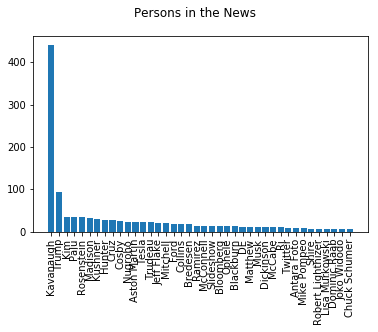

In [93]:
personen = sorted(personenkompakt.items(), key=itemgetter(1),reverse=True)

names = list(zip(*personen))[0][0:40]
values = list(zip(*personen))[1][0:40]
x_pos = np.arange(len(names)) 

plt.xticks(rotation='vertical')
plt.subplots_adjust(bottom=0.2)
plt.bar(x_pos, values)
plt.xticks(x_pos, names) 
plt.suptitle('Persons in the News')
plt.savefig('./images/hauefigkeit_news_en.png', dpi=300)
plt.show()

## Build list of counts per day

In [94]:
datumliste={}

for i in range(0, len(df)):
    body = df.iloc[i]['Body']
    titel = df.iloc[i]['Titel']
    datum = df.iloc[i]['Datum']
    datum = datum.split(" ")[0]
    doc = doc = nlp(titel + "\n" + body)
    for ent in doc.ents:
        if ent.label_ == 'PERSON':
            if ent.text in datumliste:
                if datum in datumliste[ent.text]:
                    datumliste[ent.text][datum] += 1
                else:
                    datumliste[ent.text][datum] = 1
            else:
                datumliste[ent.text] = {}
                datumliste[ent.text][datum] = 1

In [95]:
datumliste

{'Bernd Berg': {'2018-10-03': 1},
 'Salman Ahmed': {'2018-10-03': 1},
 'Donald Trump': {'2018-10-03': 6,
  '2018-10-02': 30,
  '2018-10-01': 28,
  '2018-09-30': 15,
  '2018-09-29': 8,
  '2018-09-28': 9,
  '2018-09-27': 2,
  '2018-09-26': 7,
  '2018-09-25': 1,
  '2018-09-24': 8,
  '2018-09-22': 3,
  '2018-09-21': 3},
 'Xi Jinping': {'2018-10-03': 1,
  '2018-10-01': 2,
  '2018-09-26': 1,
  '2018-09-30': 1},
 'Phil Noble': {'2018-10-03': 1},
 'Joko Widodo': {'2018-10-02': 1,
  '2018-10-03': 2,
  '2018-10-01': 1,
  '2018-09-29': 2},
 'Palu': {'2018-10-02': 9,
  '2018-10-03': 1,
  '2018-10-01': 11,
  '2018-09-29': 13},
 'Widodo': {'2018-10-02': 2, '2018-10-03': 1, '2018-09-29': 1},
 'Sutopo Purwo Nugroho': {'2018-10-02': 1,
  '2018-10-01': 2,
  '2018-09-30': 1,
  '2018-09-29': 1},
 'Verwandte': {'2018-10-02': 1},
 'Lian Gogali': {'2018-10-02': 1, '2018-10-01': 1, '2018-09-29': 1},
 'Yahdi Basma': {'2018-10-02': 1},
 'Mutiara Sis Al Jufri Airport': {'2018-10-02': 1, '2018-10-01': 1},
 'Athit

In [96]:
import json
json = json.dumps(datumliste)
f = open("./datasets/datumliste_en.json","w")
f.write(json)
f.close()

## Map personlists together (i.e. "Donald Trump" and "Trump")

In [97]:
def uniondict(dict1,dict2):
    returndict ={}
    
    allkeys = list(set(list(dict1.keys()) + list(dict2.keys())))
    allvalues = [0] * len(allkeys)
    for i in range(len(allkeys)):
        returndict[allkeys[i]] = allvalues[i]
    
    for key1, value1 in dict1.items():
        returndict[key1] += value1
    for key2, value2 in dict2.items():
        returndict[key2] += value2
                
    return returndict

In [98]:
def datekompakt(inputdict):
    outputdict = {}

    for name, datelist in inputdict.items():
        for key in inputdict.keys():
            if (name == key):
                continue
            if (name in key) and (len(inputdict[name]) > 3):
                inputdict[name] = uniondict(inputdict[key],datelist)
                inputdict[key] = {}
                break
    for name, datelist  in inputdict.items():
        if datelist != {}:      
            outputdict[name] = datelist
    return outputdict

## Clean lists

In [99]:
datumclean= cleandict_en(datumliste)

In [100]:
datumkompakt = datekompakt(datumclean)

In [103]:
import json
json = json.dumps(datumkompakt)
f = open("./datasets/datumliste_en_clean.json","w")
f.write(json)
f.close()

## Lineplots for persons

In [101]:
def namenplot(name1, name2, startdatum, enddatum, frequenz, savepfad):
    dict1 = datumkompakt[name1]
    dict2 = datumkompakt[name2]

    datelist = pd.date_range(start=startdatum, end=enddatum).tolist()
    datelist = pd.to_datetime((datelist))

    y_name1 =[]
    y_name2 =[]
    for date in datelist:
        if str(date).split()[0] in dict1:
            y_name1.append(dict1[str(date).split()[0]])
        else:
            y_name1.append(0)
        if str(date).split()[0] in dict2:
            y_name2.append(dict2[str(date).split()[0]])
        else:
            y_name2.append(0)

    tickslist = pd.date_range(start=startdatum, end=enddatum, freq=frequenz).tolist()

    plt.plot(datelist, y_name1,label=name1)
    plt.plot(datelist, y_name2,linestyle='--',label=name2)
    max1 = max(y_name1)
    max2 = max(y_name2)
    plt.axis([startdatum, enddatum, 0, max([max1,max2])+3])

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    plt.xlabel('Date')
    plt.xticks(tickslist)
    plt.ylabel('Frequecy')
    plt.suptitle('Mentions in the news ' + name1 + " and " + name2)
    plt.gcf().autofmt_xdate()
    plt.legend()
    plt.savefig(savepfad, dpi=300)
    plt.show()

AttributeError: 'numpy.str_' object has no attribute 'toordinal'

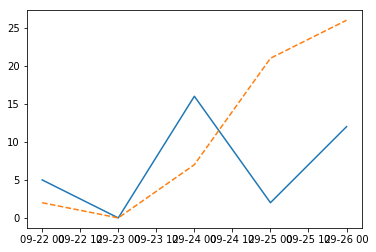

In [106]:
namenplot("Trump", "Kavanaugh", "2018-09-22", "2018-09-26", '1D', './images/trump_obama.png')